# Homework Assignment #5 (Individual)

## Using SVMs and PCA with new data: The Palmer Penguins Dataset

### <p style="text-align: right;"> &#9989; Put your name here.</p>
### <p style="text-align: right;"> &#9989; Put your _GitHub username_ here.</p>

<img src="https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png" width=400px align="right" style="margin-left: 20px" alt="The Palmer Penguis, image credit: https://allisonhorst.github.io/palmerpenguins/">

### Goals for this homework assignment

By the end of this assignment, you should be able to:
* Use `git` to track your work and turn in your assignment
* Read in data and prepare it for modeling
* Build, fit, and evaluate an SVC model of data
* Use PCA to reduce the number of important features
* Build, fit, and evaluate an SVC model of PCA-transformed data
* Systematically investigate the effects of the number of PCA components on an SVC model of data

### Assignment instructions:

Work through the following assignment, making sure to follow all of the directions and answer all of the questions.

There are **47 points (+2 bonus points)** possible on this assignment. Point values for each part are included in the section headers.

This assignment is **due at 11:59 pm on Friday, December 3. It should be pushed to your repo (see Part 1) and submitted to D2L**. 

#### Imports

It's useful to put all of the imports you need for this assignment in one place. Read through the assignment to figure out which imports you'll need or add them here as you go.

In [2]:
# Put all necessary imports here
import numpy as np
from sklearn.datasets import fetch_lfw_people
import matplotlib.pylab as plt
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import pickle
import time
from sklearn.decomposition import PCA
import pandas as pd

---
## 1. Add to your Git repository to track your progress on your assignment (4 points)

As usual, for this assignment, you're going to add it to the `cmse202-f21-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-f21-turnin` repository and create a new directory called `hw-05`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Make sure you've added your Professor and your TA as collaborators to your "turnin" respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-f21-turnin`" repository inside the `hw-05` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

``` bash
# Put the command for cloning your repository here!
git clone https://github.com/zimbot13/cmse202-f21-turnin/tree/main/hw-05
```

---
<a id="loading"></a>
## 2. Loading a new dataset: The Palmer Penguins data (8 points)

We've the seen the iris dataset a number of times in the course so far and it has a number of nice features that make it useful for getting some practice with some of the machine learning methods that are around today. However, recently a new dataset was suggested as a possible replacement/alternative for the iris data: the "Palmer Penguins" -- perhaps you've already seen it before! This dataset also has some nice properties that make it a good playground for experiment with machine learning tools. You can learn more about the dataset on the [their website](https://allisonhorst.github.io/palmerpenguins/).

Since the goal for this assignment is to practice using the SVM and PCA tools we've covered in class, we'll going to use this relatively simple dataset and avoid any complicated data wrangling headaches!
 
#### The data

The penguins dataset is pretty straight forward, but you'll need to download the data and give yourself some time to get familiar with it.

**&#9989; Do This:**  To get started, **you'll need to download the following file**:

`https://raw.githubusercontent.com/msu-cmse-courses/cmse202-F21-data/main/data/penguins_size.csv`

Once you've downloaded the data, **open the files using a text browser or other tool on your computer and take a look at the data to get a sense for the information it contains.** You'll probably also want to read through the information on the [palmerpenguins website](https://allisonhorst.github.io/palmerpenguins/) to get a sense for what the values correspond to. The website talks about two different versions of the data, a simplified one and a "raw" one with more values. **Which one are you working with?**

### 2.1 Load the data

**&#9989; Task 2.1 (2 points):** Read the ```penguin_size.csv``` file into your notebook. For the purposes of this assignment, we're going to use "species" as the class that we'll be trying to predict with our classification model. To make this clear, you should **rename the `species` column to be `class`**. The species class should currently have the following class labels:
* "Adelie"
* "Chinstrap"
* "Gentoo"

Once you've loaded in the data and changed the `species` column to `class`, **display the DataFrame to make sure it looks reasonable**. You should have **7 columns** and **344 rows**.

In [25]:
# Put your code here
penguins = pd.read_csv('penguins_size.csv')
penguins.head()
penguins.rename(columns={'species': 'class'}, inplace=True)
penguins.head()

,class,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 2.2 Relabeling the classes

To simplify the process of modeling the penguin data, we should convert the class labels from strings to integers. For example, rather than `Adelie`, we can consider this to be class "`0`".

**&#9989; Task 2.2 (2 points):** Replace all of the strings in your "class" column with integers based on the following:

| original label | replaced label |
| -------- | -------- |
| Adelie | 0 |
| Chinstrap | 1 |
| Gentoo | 2 |

Once you've replaced the labels, display your DataFrame and confirm that it looks correct.

In [26]:
# Put your code here
penguins.replace({'Adelie': 0, 'Chinstrap':1,'Gentoo':2},inplace=True)
penguins.head()

,class,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,0,Torgersen,NaN,NaN,NaN,NaN,NaN
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### 2.3 Removing rows with missing data

At this point, you've hopefully noticed that some of the rows seems to be missing data values as indicated by the existence of `NaN` values. Since we don't necessarily know what to replace these values with, let's just play it safe and remove all of the rows that have `NaN` in any of the column entries. This should help to ensure that we don't end up with errors or confusing results when we try to classify the data.

**&#9989; Task 2.3 (1 point):** Remove all of the rows that contain a `NaN` in any column. **Make sure you actually store this new version of your dataframe either in the original variable name or in a new variable name**. If everything went as intended, you should find that you have 334 rows left over.

In [28]:
# Put your code here 
penguins = penguins.dropna()
penguins.head()

,class,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,0,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,0,Torgersen,39.3,20.6,190.0,3650.0,MALE


### 2.4 Separating the "features" from the "labels"

As we've seen when working with `sklearn` it can be much easier to work with the data if we have separate variables that store the features and the labels.

**&#9989; Task 2.4 (1 point):** Split your DataFrame so that you have two separate DataFrames, one called `features`, which contains all of the penguin features, and one called `labels`, which contains all of the *new* penguin integer labels you just created.

In [45]:
# Put your code here
features = penguins[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]
labels = penguins['class']
labels.value_counts()

0    146
2    120
1     68
Name: class, dtype: int64

&#9989; **Question 2.1 (1 point):** How balanced is your set of penguin classes? Does it matter for the set of classes to be balanced? Why or why not? (You might need to write a bit of code to figure out how balanced your set of penguin classes is.)

<font size=+3>&#9998;</font> The data set is not very balanced and favors the Adelie and Gentoo penguins more. It does matter as a more balanced data set will result in a better outcome as the data will not be biased towards one type of penguin.

### 2.5 Dropping the non-numeric features

The last thing we should probably do before you move on to building your classifier model is to drop the two categorical (i.e. non-numeric) features from our set of features to avoid confusing or complicating the model.

**&#9989; Task 2.5 (1 point):** Drop the two non-numeric columns from your new `features` dataframe. You should end up with your final four features, which should all have floating point values. **Display your new `features` dataframe to make sure this is true**.

In [46]:
# Put your code here
features.drop(columns=['sex','island'],axis=1,inplace=True)

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 2", and push the changes to GitHub.

---

---
## 3. Building an SVC model (4 points)

Now, to tackle this classification problem, we will use a support vector machine just like we've done previously (e.g. in the **Day 19 and Day 20 assignments**). Of course, we could easily replace this with any `sklearn` classifier we choose, but for now we will just use an SVC with a linear kernel.

### 3.1 Splitting the data

But first, we need to split our data into training and testing data!

**&#9989; Task 3.1 (1 point):** Split your data into a training and testing set with a training set representing 75% of your data. For reproducibility , set the `random_state` argument to `314159`. Print the lengths to show you have the right number of entries.

In [61]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features,labels,train_size=0.75,random_state=314159)

### 3.2 Modeling the data and evaluating the fit

As you have done this a number of times at this point, we ask you to do most of the analysis for this problem in one cell.

**&#9989; Task 3.2 (2 points):** Build a linear SVC model with `C=0.01`, fit it to the training set, and use the test features to predict the outcomes. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [62]:
# Put your code here
start = time.time()
tmp_vectors = train_vectors
tmp_labels = train_labels
param_grid = {'C': [0.01],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['linear']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)
end = time.time()

predict_vectors = test_vectors
true_labels = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(3)))

Best estimator found by grid search:
SVC(C=0.01, class_weight='balanced', gamma=0.0001, kernel='linear')
Best parameters found by grid search:
{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.95      1.00      0.97        18
           2       0.97      1.00      0.98        29

    accuracy                           0.98        84
   macro avg       0.97      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84

[[35  1  1]
 [ 0 18  0]
 [ 0  0 29]]


&#9989; **Question 3.1 (1 point):** How accurate is your model? What evidence are you using to determine that? How many false positives and false negatives does it predict for each class?

<font size=+3>&#9998;</font> The model is very accurate as it has a weighted average of 98%. For the first class, Adelie it had 2 false negatives and no false negatives, the second class Chinstrap had no false negatives but 1 false postives and the final class Gentoo had 1 false postives and no false negatives.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 3", and push the changes to GitHub.

---

---
## 4. Finding and using the best hyperparameters (8 points)

At this point, we have fit one model and determined it's performance, but is it the best model? We can use `GridSearchCV` to find the best model (given our choices of parameters). Once we do that, we will use that "best" model for making predictions. This is similar to what we did when working with the "digits" data and the "faces" data in the **Day 20 and Day 21 assignments**.

**Note:** you would typically rerun this grid search in a production environment to continue to verify the best model, but we are not for the sake of speed.

### 4.1 Performing a grid search

**&#9989; Task 4.1 (4 points):** Using the following parameters (`C` = `1e-3`, `0.01`, `0.1`, `1`, `10`, `100` and `gamma` = `1e-6`, `1e-5`, `1e-4`, `1e-3`, `0.01`, `0.1`) for both a `linear` and `rbf` kernel use `GridSearchCV` with the `SVC()` model to find the best fit parameters. Once, you're run the grid search, print the "best estimators".

In [63]:
# Put your code here
start = time.time()
tmp_vectors = train_vectors
tmp_labels = train_labels
param_grid = {'C': [1e-3, 0.01, 0.1, 1, 10, 100],
              'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 0.01],
              'kernel': ['linear','rbf']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)
end = time.time()

Best estimator found by grid search:
SVC(C=0.01, class_weight='balanced', gamma=1e-06, kernel='linear')
Best parameters found by grid search:
{'C': 0.01, 'gamma': 1e-06, 'kernel': 'linear'}


&#9989; **Question 4.1 (1 point):** How do the "best estimator" results of the grid search compare to what you used in Part 3? Did the hyper parameter(s) change? What kernel did the grid search determine was the best option? 

<font size=+3>&#9998;</font> The best estimates did change from the first part, the C value is still 0.1 and the gamma is 1e-06 but the kernel remainded linear.

### 4.2 Evaluating the best fit model

Now that we have found the "best estimators", let's determine how good the fit is.

**&#9989; Task 4.2 (2 points):** Use the test features to predict the outcomes for the best model. Evaluate the fit using the **confusion matrix** and **classification report**.

**Note:** Double-check the documentation on the confusion matrix because the way `sklearn` outputs false positives and false negatives may be different from what most images on the web indicate.

In [64]:
# Put your code here
predict_vectors = test_vectors
true_labels = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(3)))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        37
           1       0.95      1.00      0.97        18
           2       0.97      1.00      0.98        29

    accuracy                           0.98        84
   macro avg       0.97      0.98      0.98        84
weighted avg       0.98      0.98      0.98        84

[[35  1  1]
 [ 0 18  0]
 [ 0  0 29]]


&#9989; **Question 4.2 (1 point):** How accurate is this best model? What evidence are you using to determine that? How many false positives and false negatives does it predict?

<font size=+3>&#9998;</font> The model is highly accurate with a 98% weighted average. It had the same number of false readings. Adelie had 2 false negatives, Chinstrap had 1 false postives and Gentoo had 1 false postive.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 4", and push the changes to GitHub.

---

---
## 5. Using Principal Components (11 points)

The full model uses all 4 penguin features to predict the results and you likely found that the model is pretty accurate using all 4 features. But in some cases, we might have significantly more features (which means much more computational time!), and we might not need nearly the level of accuracy we can achieve with the full data set or we might not have enough computational resources to use **all** of the features.

In such situations, we might need to see how close we can get with fewer features. But instead of simply removing features, we will use a Principal Component Analysis (PCA) to determine the features that contribute the most the model (through their accounted variance) and use those to build our SVC model. We did this to improve our classification with the "faces" dataset in the **Day 21 assignment**.

### 5.1 Doing a little bit of data preparation before we perform our PCA

Because the features in our dataset have very different relative values (i.e. `body_mass_g` is in the range 3000-5000, but `bill_depth_mm` is the range 10-20), the variation captured by the PCA will be skewed by these relative differences. As a result, it is good practice to **normalize** the features so that they have comparable values. Thankfully, `sklearn` has a useful function for doing this!

&#9989; **Do This**: Run the following cell which uses a `sklearn` function to perform a "Min-Max" scaling to normalize the features. These new features are stored in the `features_norm` variable. Take a look at the output to get a sense for how the values change when they are normalized.

In [74]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
features_norm = pd.DataFrame(min_max_scaler.fit_transform(features), columns=features.columns, index=features.index)
features_norm

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,0.254545,0.666667,0.152542,0.291667
1,0.269091,0.511905,0.237288,0.305556
2,0.298182,0.583333,0.389831,0.152778
4,0.167273,0.738095,0.355932,0.208333
5,0.261818,0.892857,0.305085,0.263889
...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056
340,0.534545,0.142857,0.728814,0.597222
341,0.665455,0.309524,0.847458,0.847222
342,0.476364,0.202381,0.677966,0.694444


### Recreating our train-test split

Now that we have new feature values, we need to create new training and testing variables. 

**&#9989; Task 5.1 (1 point):** As you did in Task 3.1 above, split your new normalized features and corresponding labels (the labels are the same as before) into a training and testing set with a training set representing 75% of your data. For reproducibility , set the `random_state` argument to `314159`. Print the lengths to show you have the right number of entries.

In [75]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features,labels,train_size=0.75,random_state=314159)

### 5.2 Running a Principle Component Analysis (PCA)

Since we only have 4 total features to start with, let's see how well we can do if we try to aggressively reduce the feature count and use only **1** principle component. We'll see how well we can predict the classes of the penguin dataset with just one!

**&#9989; Task 5.2 (3 points):**  Using `PCA()` and the associated `fit()` method, run a principle component analysis on your training features using only 1 component. Transform both the test and training features using the result of your PCA. Print the `explained_variance_ratio_`.

In [76]:
# Put your code here
pca = PCA(n_components=1, whiten=True)
_ = pca.fit(train_vectors)
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)
print(pca.explained_variance_ratio_)

[0.99989412]


&#9989; **Question 5.1 (1 point):** What is the total explained variance ratio captured by this simple 1-component PCA? (just quote the number) How well do you think a model with this many feature will perform? Why?

<font size=+3>&#9998;</font> The explained variance ratio is .99989412. I think this model will preform well as it has a high degree of correlation between the one component.

### 5.2 Fit and Evaluate an SVC model

Using the PCA transformed features, we need to train and test a new SVC model. You'll want to perform the `GridSearchCV` again since there may a better choice for the kernel and the hyper-parameters.

**&#9989; Task 5.3 (2 points):**  Using the PCA transformed training data, build and train an SVC model using the `GridSearchCV` tool to make sure you're using the best kernel and hyper-parameter combination. Predict the classes using the PCA transformed test data. Evaluate the model using the classification report, and the confusion matrix.

In [77]:
# Put your code here
start = time.time()
tmp_vectors = pca_train_vectors
tmp_labels = train_labels
param_grid = {'C': [1e-3, 0.01, 0.1, 1, 10, 100],
              'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 0.01],
              'kernel': ['linear','rbf']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)
end = time.time()

predict_vectors = pca_test_vectors
true_labels = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(3)))

Best estimator found by grid search:
SVC(C=0.01, class_weight='balanced', gamma=1e-06, kernel='linear')
Best parameters found by grid search:
{'C': 0.01, 'gamma': 1e-06, 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.32      1.00      0.48        18
           2       0.85      0.79      0.82        29

    accuracy                           0.49        84
   macro avg       0.39      0.60      0.43        84
weighted avg       0.36      0.49      0.39        84

[[ 0 33  4]
 [ 0 18  0]
 [ 0  6 23]]


C:\Users\Ted\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ted\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ted\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


&#9989; **Question 5.2 (1 point):** How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the full feature model? Which classes does it seem to be struggling the most with classifying? Why might that be?

<font size=+3>&#9998;</font> This model preformed poorly and was not accurate. It has a weighred average of 36%. It produced 43 false negatives and psotives. Compared to the full model it is very bad. It stuggles with the Adelie(0) class the most as it did not get a single one correct.

### 5.3 Repeat your analysis with more components

You probably found that the model with just 1 features didn't actually do too bad, which is pretty impressive. That said, can we do better?

What if we increase the number of principle components to **2**? What happens now?

**&#9989; Task 5.4 (2 points):** Repeat your analysis from 5.1 and 5.2 using **2 components** instead. As part of your analysis, **print the total explained variance ratio for both components as well as the sum of these values**.

In [96]:
# Put your code here
pca = PCA(n_components=2, whiten=True)
_ = pca.fit(train_vectors)
pca_train_vectors = pca.transform(train_vectors)
pca_test_vectors = pca.transform(test_vectors)
print(np.array(pca.explained_variance_ratio_).sum())

start = time.time()
tmp_vectors = pca_train_vectors
tmp_labels = train_labels
param_grid = {'C': [1e-3, 0.01, 0.1, 1, 10, 100],
              'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 0.01],
              'kernel': ['linear','rbf']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)
end = time.time()

predict_vectors = pca_test_vectors
true_labels = test_labels

pred_labels = clf.predict(predict_vectors)

print(classification_report(true_labels, pred_labels))
print(confusion_matrix(true_labels, pred_labels, labels=range(3)))

0.9999728848538341
Best estimator found by grid search:
SVC(C=10, class_weight='balanced', gamma=0.01)
Best parameters found by grid search:
{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.82      0.76      0.79        37
           1       0.52      0.61      0.56        18
           2       0.97      0.97      0.97        29

    accuracy                           0.80        84
   macro avg       0.77      0.78      0.77        84
weighted avg       0.81      0.80      0.80        84

[[28  9  0]
 [ 6 11  1]
 [ 0  1 28]]


&#9989; **Question 5.3 (1 point):** What is the total explained variance ratio captured by this PCA? How accurate is this model? What evidence are you using to determine that? How many false positives and false negatives does it predict? How does it compare to the 1 PCA component model? To the full feature model?

<font size=+3>&#9998;</font> The variance of components is .99997288. This model is fairly accurate with a weighted average of 81%. It produces 17 false postives and negatives. It still under preforms compared to the full feature model. 

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 5", and push the changes to GitHub.

---

---
## 6. How well does PCA work? (12 points)

Clearly, the number of components we use in our PCA matters. Let's investigate how they matter by systematically building a model for any number of selected components. While this might seem a bit unnecessary for such a simple dataset, **this can be very useful for more complex datasets and models!**

### 6.1 Accuracy vs. Components

To systematically explore how well PCA improves our classification model, we will do this by writing a function that creates the PCA, the SVC model, fits the training data, predict the labels using test data, and returns the accuracy scores and the explained variance ratio. So your function will take as input:
* the number of requested PCA components
* the training feature data
* the testing feature data
* the training data labels
* the test data labels

and it should **return** the accuracy score for an SVC model fit to pca transformed features and the **total** explained variance ratio (i.e. the sum of the explained variance for each component).

**&#9989; Task 6.1 (4 points):** Create this function, which you will use in the next section.

In [106]:
# Put your code here
def PCA_accuracy(n_components,train_vectors,test_vectors,train_labels,test_labels):
    
    pca = PCA(n_components=n_components, whiten=True)
    _ = pca.fit(train_vectors)
    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    total_variance_ratio = (np.array(pca.explained_variance_ratio_)).sum()
    start = time.time()
    tmp_vectors = pca_train_vectors
    tmp_labels = train_labels
    param_grid = {'C': [1e-3, 0.01, 0.1, 1, 10, 100],
                  'gamma': [1e-6, 1e-5, 1e-4, 1e-3, 0.01],
                  'kernel': ['linear','rbf']}
    clf = GridSearchCV(SVC(class_weight='balanced'), param_grid)
    clf = clf.fit(tmp_vectors, tmp_labels)
    end = time.time()

    predict_vectors = pca_test_vectors
    true_labels = test_labels

    pred_labels = clf.predict(predict_vectors)
    report = classification_report(true_labels, pred_labels,output_dict=True)
    accuracy = report['accuracy']
    return accuracy, total_variance_ratio


### 6.2 Compute accuracies

Now that you have created a function that returns the accuracy for a given number of components, we will use that to plot the how the accuracy of your SVC model changes when we increase the number of components used in the PCA.

**&#9989; Task 6.2 (2 points):** For 1 through 4 components, use your function above to compute and store (as a list) the accuracy of your models and the total explained variance ratio of your models.

In [113]:
# Put your code here
train_vectors, test_vectors, train_labels, test_labels = train_test_split(features,labels,train_size=0.75,random_state=314159)
acc = []
var = []
for i in range(4):
    a,v = PCA_accuracy(i+1,train_vectors,test_vectors,train_labels,test_labels)
    acc.append(a)
    var.append(v)

C:\Users\Ted\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ted\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ted\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6.3 Plot accuracy vs number of components

Now that we have those numbers, it makes sense to look at the accuracy vs # of components.

**&#9989; Task 6.3 (2 points):** Plot the accuracy vs # of components.

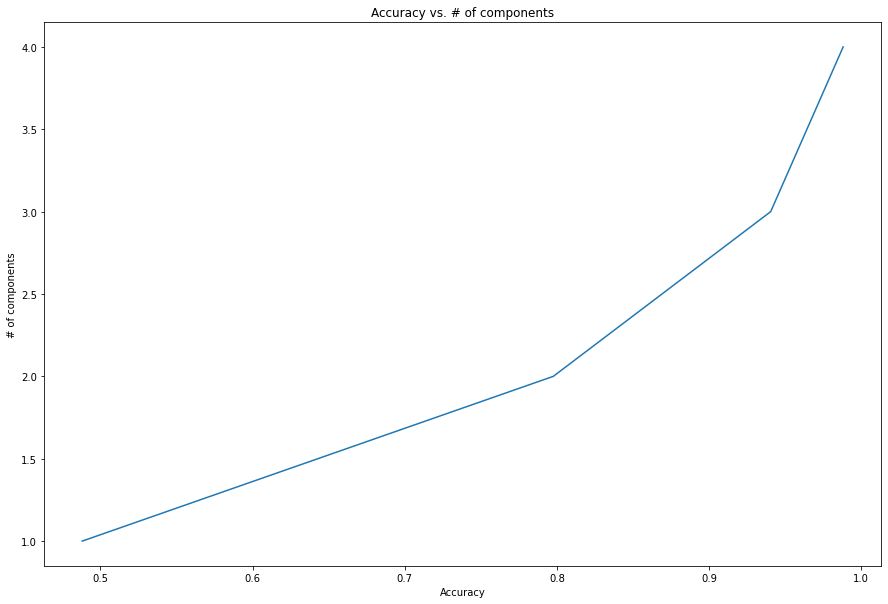

In [110]:
# Put your code here
plt.figure(figsize=[15,10])
plt.plot(acc,[1,2,3,4])
plt.title('Accuracy vs. # of components')
plt.xlabel('Accuracy')
plt.ylabel('# of components')
plt.show()

**&#9989; Question 6.1 (1 point):** Where does it seem like we have diminishing returns? That is, at what point is there no major increase in accuracy (or perhaps the accuracy is decreased) as we add additional components to the PCA?

<font size=+3>&#9998;</font> Going from 3 to 4 components has diminishing returns.

### 6.4 Plot total explained variance vs number of components

What if we look at total explained variance as a function of # of components?

**&#9989; Task 6.4 (2 points):** Plot the total explained variance ratio vs # of components. 

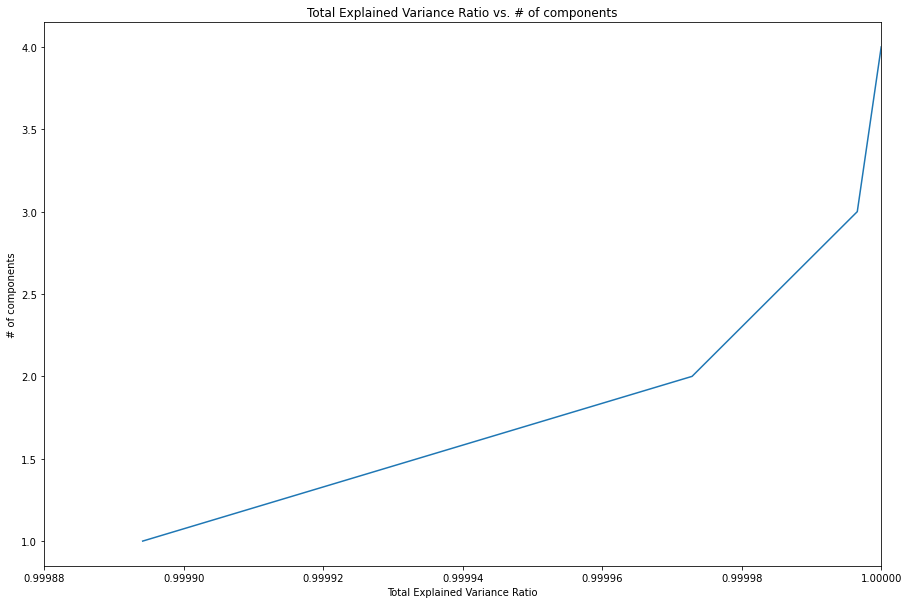

In [119]:
# Put your code here
plt.figure(figsize=[15,10])
plt.plot(var,[1,2,3,4])
plt.title('Total Explained Variance Ratio vs. # of components')
plt.xlabel('Total Explained Variance Ratio')
plt.xlim(.99988,1)
plt.ylabel('# of components')
plt.show()

**&#9989; Question 6.2 (1 points):** Where does it seem like we have diminishing returns, that is, no major increase in explained variance as we add additional components to the PCA? How does that number of components compare to the diminishing returns for accuracy?

<font size=+3>&#9998;</font> From 3 to 4 components has diminished returns. This is at the same point for the dimishing returns for accuracy.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository using the commit message "Committing Part 6", and push the changes to GitHub.

---

---
## 7. Bonus exercise: visualizing the decision boundaries for a portion of the feature space (2 *bonus* points)

As you might imagine, visualizing decision boundaries with for a multidimensional feature space can be a challenge! That said, when trying to build some intuition about how these classifiers work, visualing 2D decisions boundaries can be useful.

To earn some _extra points_ on this assignment try using the [following example](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) as a guide to visualize the decision boundary for your "best estimator" parameters using your **2 PCA components** as your training features. **To be clear, you should be using your PCA component data and your best fit parameters, you should not just be running the example!** You should be able to get a plot that looks something like this:

<img src="https://i.ibb.co/FYgFv5g/pca-boundaries.png" alt="pca-boundaries" border="0">

Since we didn't explicitly cover this in class, **you do not have to complete this part of the assignment unless you would like the extra credit points**.

**&#9989; Task 7.1 (2 *extra* points):** Try to create a plot of the decision boundaries for the 2 principle components using your "best estimator" parameters.

In [122]:
# Put your code here
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with

# Take the first two features. We could avoid this by using a two-dim dataset
X = pca_train_vectors[:1]
y = pca_training_vectors[:2]

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel("Sepal length")
    ax.set_ylabel("Sepal width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

NameError: name 'pca_training_vectors' is not defined

---
## Assignment wrap-up¶
Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!**

In [79]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/Pages/ResponsePage.aspx?id=MHEXIi9k2UGSEXQjetVofddd5T-Pwn1DlT6_yoCyuCFUNDRHM0o3SFE1TUJCWkkyTFhLWDM3OEZFRi4u" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!
Submit this assignment by uploading it to the course Desire2Learn web page. Go to the "Homework Assignments" folder, find the submission folder for Homework #5, and upload your notebook.